# 기본설정

```
id : 샘플 아이디
age : 나이
workclass : 일 유형
fnlwgt : CPS(Current Population Survey) 가중치
education : 교육수준
education.num : 교육수준 번호
marital.status : 결혼 상태
occupation : 직업
relationship : 가족관계
race : 인종
sex : 성별
capital.gain : 자본 이익
capital.loss : 자본 손실
hours.per.week : 주당 근무시간
native.country : 본 국적
target : 소득
````

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.9 MB/s 
     |████████████████████████████████| 120 kB 57.9 MB/s 
     |████████████████████████████████| 1.7 MB 43.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 53.1 MB/s 
     |████████████████████████████████| 167 kB 76.6 MB/s 
     |████████████████████████████████| 88 kB 9.9 MB/s 
     |████████████████████████████████| 2.0 MB 56.9 MB/s 
     |████████████████████████████████| 6.8 MB 60.3 MB/s 
     |████████████████████████████████| 262 kB 77.4 MB/s 
     |████████████████████████████████| 56 kB 6.6 MB/s 
     |████████████████████████████████| 17.8 MB 55.9 MB/s 
     |████████████████████████████████| 1.3 MB 59.8 MB/s 
     |████████████████████████████████| 

In [1]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
# from lightgbm import LGBMClassifier

plt.rcParams['font.family'] = 'NanumGothic'

# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
# 여러가지 머신러닝 모델을 가지고 있는 라이브러리 *가장 많이 사용* 
import sklearn
# 공통 모듈 임포트
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 데이터 전처리

### 데이터 가져오기

In [ ]:
cd '/content/drive/MyDrive/소득예측'

/content/drive/MyDrive/소득예측


In [2]:
#data불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
del train['education']
del test['education']

## 결측치

In [4]:
###train결측값 확인
train.isnull().sum()
# workclass, occupation, native.country 에 결측값이 존재한다.

id                   0
age                  0
workclass         1836
fnlwgt               0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [5]:
train.isnull().sum().sort_values(ascending=False)


occupation        1843
workclass         1836
native.country     583
id                   0
age                  0
fnlwgt               0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
target               0
dtype: int64

In [6]:
# 결측치를 제거해준다.
train = train.dropna(axis=0)

## 상관관계 분석

**수치형 자료**
```
'id','age', 'fnlwgt', 'education.num','capital.gain', 'capital.loss', 'hours.per.week', 'target'
```
**범주형 자료**
```
'workclass','marital.status','occupation','relationship','race','sex','native.country'

### 범주형 상관관계 분석

In [7]:
train_label_encoder = train.copy()
train_label_encoder

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,35,Private,337286,14,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,0
15077,15077,36,Private,182074,10,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,45,United-States,0
15078,15078,50,Self-emp-inc,175070,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1
15079,15079,39,Private,202937,10,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,Poland,0


label encoder

In [8]:
# 상관관계 분석을 하기 위해 범주형 변수들을 수치형으로 바꿔줘야 하는데 one-hot encoding을 사용하면 변수들이 너무 많아져 시각화가 어려워진다.
# 또, label encoding을 사용하면 분석 결과가 안좋아질 수 있으므로 복제하여 train_label_encoder 만든 뒤 상관관계분석을한다.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_label_encoder['workclass'] = le.fit_transform(train['workclass'])
train_label_encoder['marital.status'] = le.fit_transform(train['marital.status'])
train_label_encoder['occupation'] = le.fit_transform(train['occupation'])
train_label_encoder['relationship'] = le.fit_transform(train['relationship'])
train_label_encoder['race'] = le.fit_transform(train['race'])
train_label_encoder['sex'] = le.fit_transform(train['sex'])
train_label_encoder['native.country'] = le.fit_transform(train['native.country'])

In [9]:
train_label_encoder.head()

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,2,309513,12,2,2,0,4,1,0,0,40,38,0
1,1,33,2,205469,10,2,3,0,4,1,0,0,40,38,1
2,2,46,2,149949,10,2,2,0,4,1,0,0,40,38,0
3,3,23,2,193090,13,4,0,3,4,0,0,0,30,38,0
4,4,55,2,60193,9,0,0,1,4,0,0,0,40,38,0


In [10]:
train_label_encoder['workclass'].value_counts()

2    11158
4     1230
1     1027
5      640
3      552
0      468
6        6
Name: workclass, dtype: int64

In [11]:
corr_matrix = train_label_encoder.corr()
corr_matrix["target"].sort_values(ascending=False)

target            1.000000
education.num     0.341073
age               0.242283
hours.per.week    0.237383
capital.gain      0.221003
sex               0.216109
capital.loss      0.153660
race              0.079966
occupation        0.047896
native.country    0.030942
workclass         0.024025
id               -0.003228
fnlwgt           -0.005028
marital.status   -0.194685
relationship     -0.249029
Name: target, dtype: float64

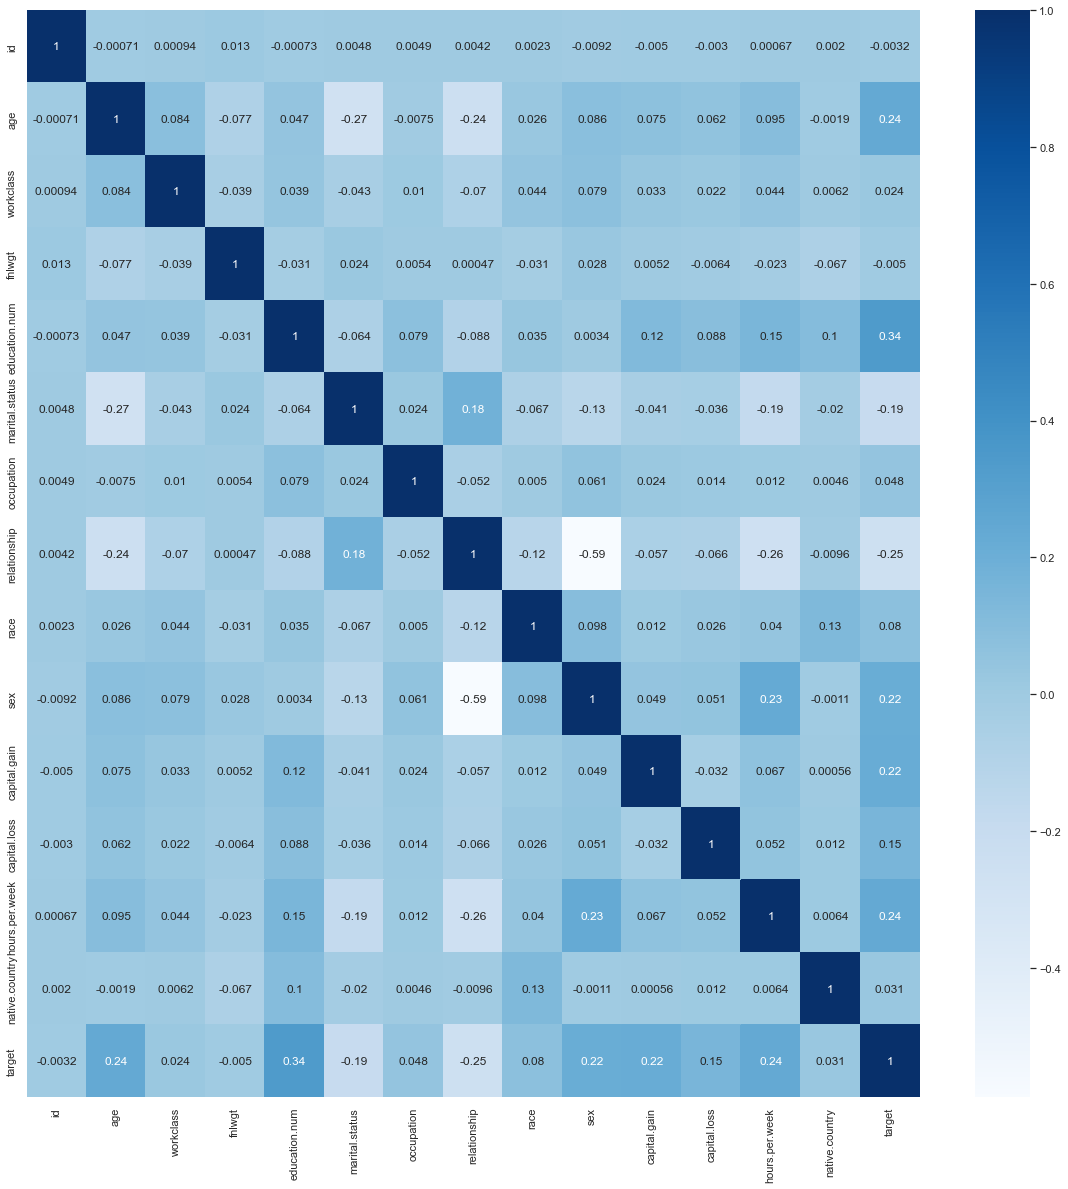

In [13]:
sns.heatmap(corr_matrix, cmap='Blues',annot=True)
sns.set(rc = {'figure.figsize':(20,20)})


### 수치형 상관관계 분석

In [14]:
corr_matrix = train.corr()
corr_matrix["target"].sort_values(ascending=False)

target            1.000000
education.num     0.341073
age               0.242283
hours.per.week    0.237383
capital.gain      0.221003
capital.loss      0.153660
id               -0.003228
fnlwgt           -0.005028
Name: target, dtype: float64

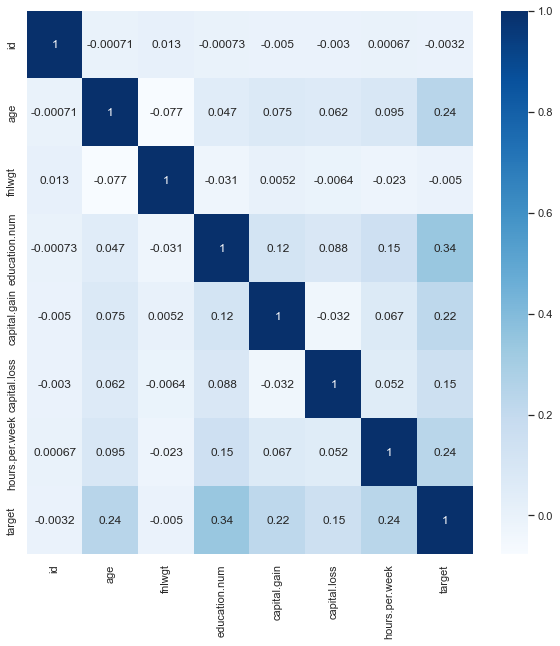

In [19]:
sns.heatmap(corr_matrix, cmap='Blues',annot=True)
sns.set(rc = {'figure.figsize':(10,10)})


상관관계 분석 결과 target과 관계성이 높은 변수는 education.num, hours.per.week, age
관계성이 낮은 변수는 fnlwgt, race, native.country

# EDA

### 필요없는 변수 제거

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

Text(0, 0.5, 'distribution')

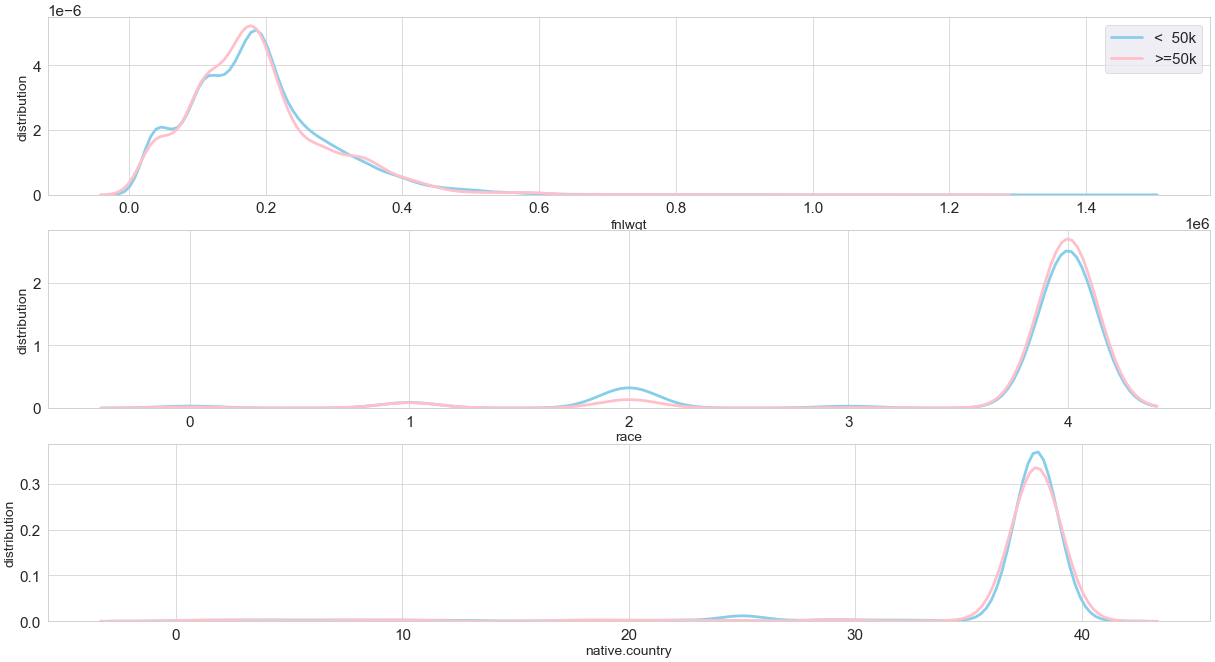

In [38]:
plt.figure(figsize=(30,16),dpi=50)
sns.set_style("whitegrid")

# income 별 fnlwgt 분포
plt.subplot(311)
fnlwgt_0 = train.loc[train['target'] == 0, 'fnlwgt']
fnlwgt_1 = train.loc[train['target'] == 1, 'fnlwgt']
sns.set(font_scale = 2)
sb = sns.distplot(fnlwgt_0, hist = False, kde_kws={"color": "skyblue", "lw": 4})
pn = sns.distplot(fnlwgt_1, hist = False, kde_kws={"color": "pink", "lw": 4})
sb.set_xlabel("fnlwgt", fontsize = 20)
pn.set_ylabel("distribution", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

sns.set_style("whitegrid")
# income 별 race 분포
plt.subplot(312)
race_0 = train_label_encoder.loc[train['target'] == 0, 'race']
race_1 = train_label_encoder.loc[train['target'] == 1, 'race']
sns.set(font_scale = 2)
sb = sns.distplot(race_0, hist = False, kde_kws={"color": "skyblue", "lw": 4})
pn = sns.distplot(race_1, hist = False, kde_kws={"color": "pink", "lw": 4})
sb.set_xlabel("race", fontsize = 20)
pn.set_ylabel("distribution", fontsize = 20)

sns.set_style("whitegrid")
# income 별 native.country 분포
plt.subplot(313)
native_country_0 = train_label_encoder.loc[train['target'] == 0, 'native.country']
native_country_1 = train_label_encoder.loc[train['target'] == 1, 'native.country']
sns.set(font_scale = 2)
sb = sns.distplot(native_country_0, hist = False, kde_kws={"color": "skyblue", "lw": 4})
pn = sns.distplot(native_country_1, hist = False, kde_kws={"color": "pink", "lw": 4})
sb.set_xlabel("native.country", fontsize = 20)
pn.set_ylabel("distribution", fontsize = 20)


In [40]:
del train['fnlwgt']
del train['race']
del train['native.country']

In [39]:
del test['fnlwgt']
del test['race']
del test['native.country']

target이 1인 값과 target이 0인 값의 그래프가 거의 차이가 없으므로 변수를 제거해준다.

In [41]:
train

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target
0,0,32,Private,12,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0
1,1,33,Private,10,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,1
2,2,46,Private,10,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0
3,3,23,Private,13,Never-married,Adm-clerical,Own-child,Female,0,0,30,0
4,4,55,Private,9,Divorced,Adm-clerical,Not-in-family,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,35,Private,14,Never-married,Exec-managerial,Not-in-family,Male,0,0,40,0
15077,15077,36,Private,10,Divorced,Adm-clerical,Not-in-family,Male,0,0,45,0
15078,15078,50,Self-emp-inc,15,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,45,1
15079,15079,39,Private,10,Divorced,Tech-support,Not-in-family,Female,0,0,40,0


## 수치형 변수 `age`, `education.num`, `capital.gain`, `capital.loss`, `hours.per.week`, `sex`

### age

In [ ]:
# train['target]열이 0인 것 중 'age'행 추출
train.loc[train['target']==0,'age']

0        32
2        46
3        23
4        55
5        33
         ..
15075    18
15076    35
15077    36
15079    39
15080    33
Name: age, Length: 11308, dtype: int64

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


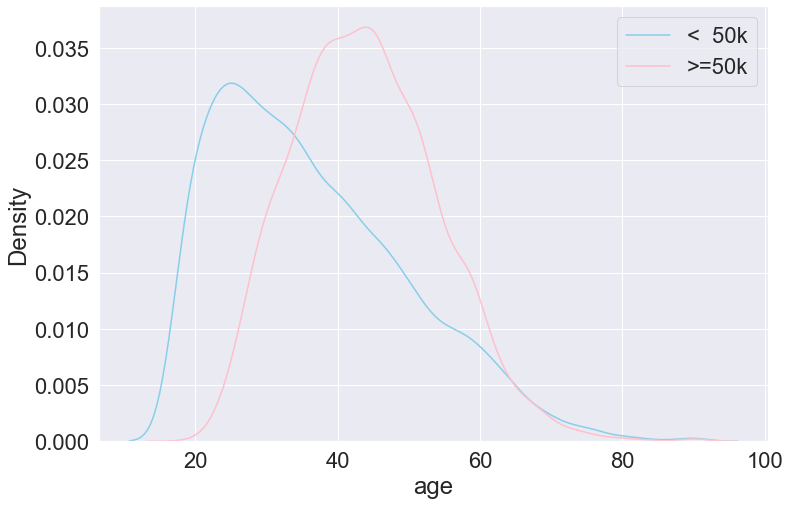

In [8]:
age_0 = train.loc[train['target'] == 0, 'age']
age_1 = train.loc[train['target'] == 1, 'age']
sns.set_style('ticks')

sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
sns.distplot(age_0,  hist=False, color='skyblue')
sns.distplot(age_1,  hist=False, color='pink')
plt.legend(labels=["<  50k",">=50k"])

age min = 17
age max = 90

In [10]:
target_1 = train.query('target==1').copy()
target_1

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target
1,1,33,Private,10,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,1
6,6,40,State-gov,15,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,38,1
13,13,51,Private,7,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,1
18,18,27,Private,10,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,1
21,21,58,Private,10,Married-civ-spouse,Sales,Husband,Male,0,0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15069,15069,42,Federal-gov,11,Divorced,Adm-clerical,Unmarried,Female,0,0,40,1
15070,15070,41,Private,10,Married-civ-spouse,Craft-repair,Husband,Male,7298,0,50,1
15072,15072,61,Private,13,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,1
15073,15073,57,Self-emp-not-inc,10,Married-civ-spouse,Transport-moving,Husband,Male,0,0,45,1


In [11]:
target_0 = train.query('target==0').copy()
target_0

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target
0,0,32,Private,12,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0
2,2,46,Private,10,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0
3,3,23,Private,13,Never-married,Adm-clerical,Own-child,Female,0,0,30,0
4,4,55,Private,9,Divorced,Adm-clerical,Not-in-family,Female,0,0,40,0
5,5,33,Private,13,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15075,15075,18,Private,9,Never-married,Machine-op-inspct,Not-in-family,Male,0,0,37,0
15076,15076,35,Private,14,Never-married,Exec-managerial,Not-in-family,Male,0,0,40,0
15077,15077,36,Private,10,Divorced,Adm-clerical,Not-in-family,Male,0,0,45,0
15079,15079,39,Private,10,Divorced,Tech-support,Not-in-family,Female,0,0,40,0


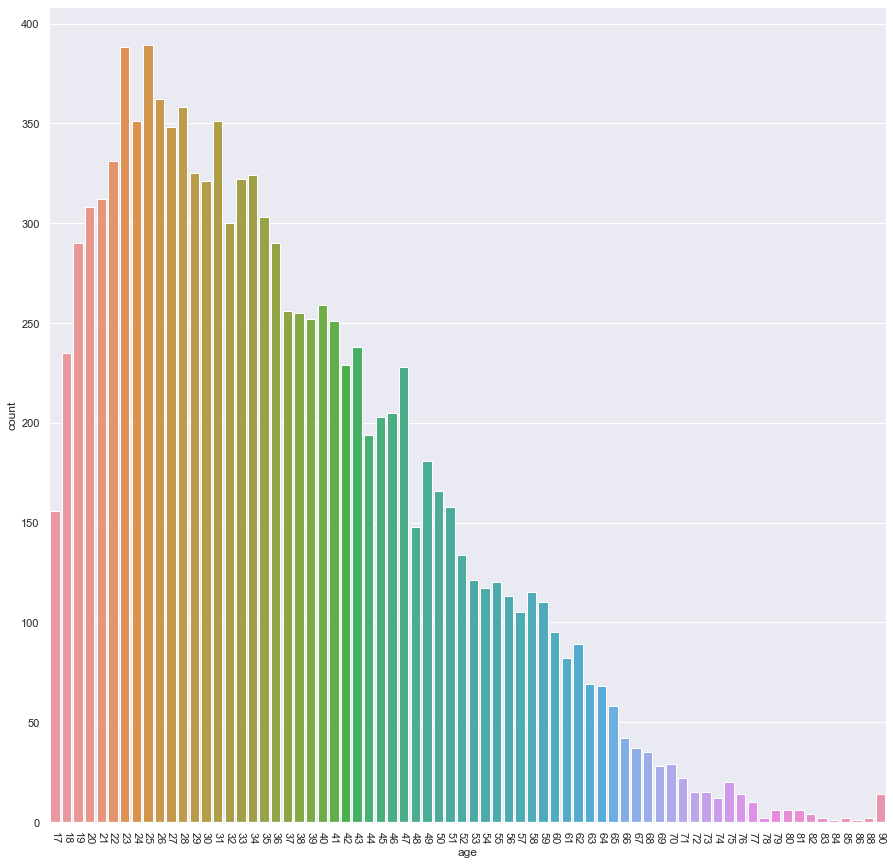

In [13]:
# target 0 age
sns.countplot(x=target_0['age'], data=target_0)
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()

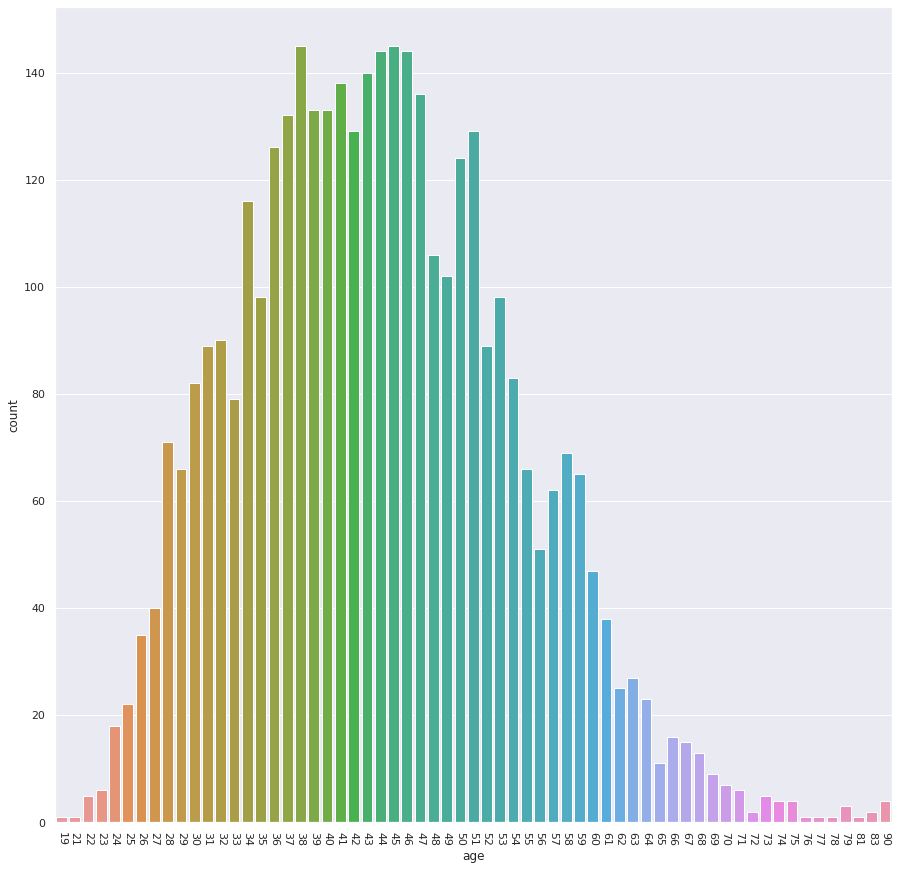

In [ ]:
# target 1 age
sns.countplot(x=target_1['age'], data=target_1)
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()

### education.num

In [43]:
target_0 = train.query('target==0').copy()
target_0

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target
0,0,32,Private,12,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0
2,2,46,Private,10,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0
3,3,23,Private,13,Never-married,Adm-clerical,Own-child,Female,0,0,30,0
4,4,55,Private,9,Divorced,Adm-clerical,Not-in-family,Female,0,0,40,0
5,5,33,Private,13,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15075,15075,18,Private,9,Never-married,Machine-op-inspct,Not-in-family,Male,0,0,37,0
15076,15076,35,Private,14,Never-married,Exec-managerial,Not-in-family,Male,0,0,40,0
15077,15077,36,Private,10,Divorced,Adm-clerical,Not-in-family,Male,0,0,45,0
15079,15079,39,Private,10,Divorced,Tech-support,Not-in-family,Female,0,0,40,0


In [44]:
target_1 = train.query('target==1').copy()
target_1

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target
1,1,33,Private,10,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,1
6,6,40,State-gov,15,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,38,1
13,13,51,Private,7,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,1
18,18,27,Private,10,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,1
21,21,58,Private,10,Married-civ-spouse,Sales,Husband,Male,0,0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15069,15069,42,Federal-gov,11,Divorced,Adm-clerical,Unmarried,Female,0,0,40,1
15070,15070,41,Private,10,Married-civ-spouse,Craft-repair,Husband,Male,7298,0,50,1
15072,15072,61,Private,13,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,1
15073,15073,57,Self-emp-not-inc,10,Married-civ-spouse,Transport-moving,Husband,Male,0,0,45,1


In [45]:
train['education.num'].value_counts()

9     4905
10    3292
13    2531
14     825
11     649
7      537
12     529
6      397
4      289
15     267
5      235
8      193
16     176
3      152
2       79
1       25
Name: education.num, dtype: int64

In [58]:
target_0['education.num'].value_counts()

9     4119
10    2603
13    1449
7      508
11     476
12     390
6      370
14     357
4      271
5      223
8      183
3      147
2       76
15      67
16      44
1       25
Name: education.num, dtype: int64

In [59]:
target_1['education.num'].value_counts()

13    1082
9      786
10     689
14     468
15     200
11     173
12     139
16     132
7       29
6       27
4       18
5       12
8       10
3        5
2        3
Name: education.num, dtype: int64

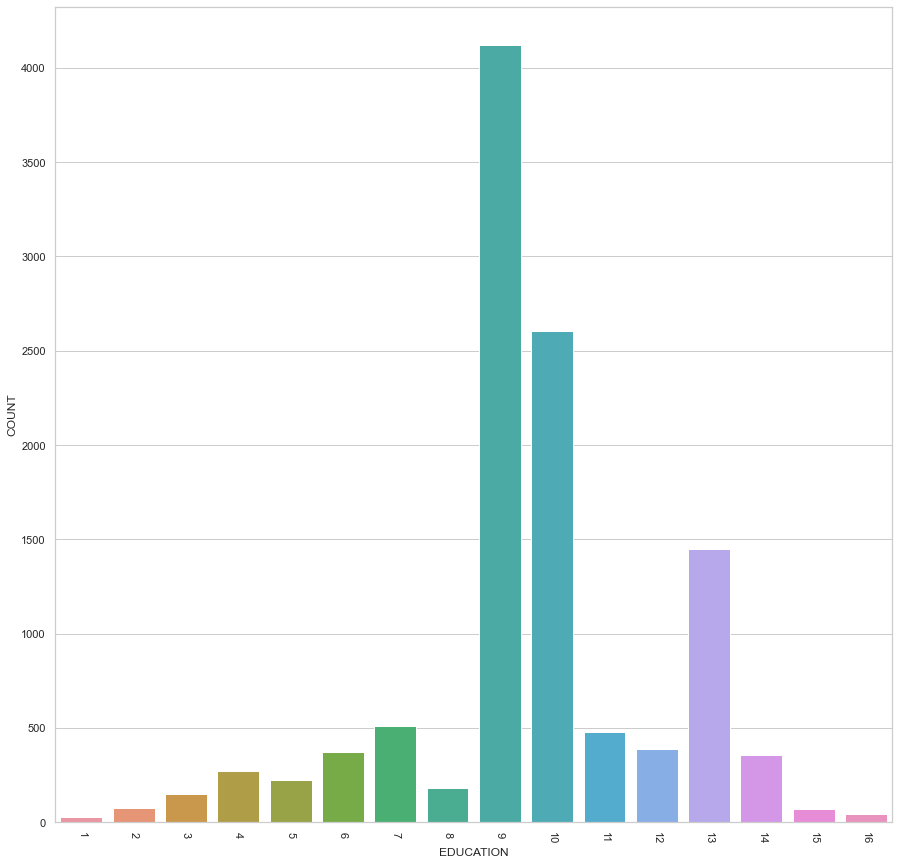

In [56]:
sns.set_style("whitegrid")
ax = sns.countplot(x=target_0['education.num'], data=target_0)
ax.set(xlabel="EDUCATION", ylabel = "COUNT")
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()

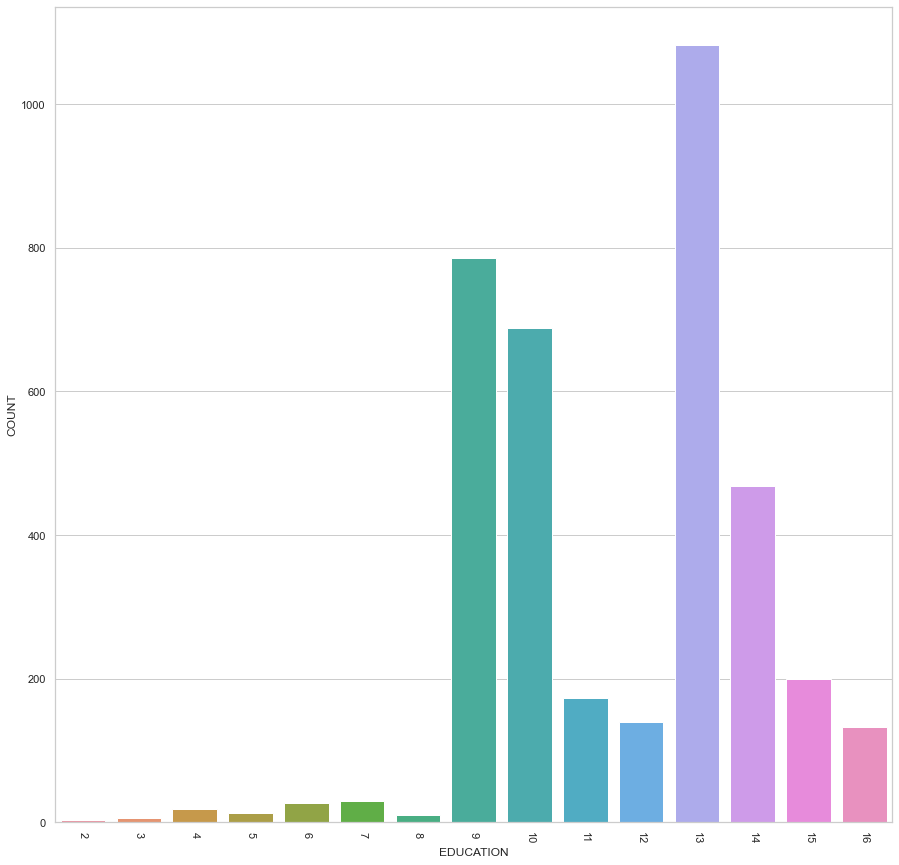

In [57]:
sns.set_style("whitegrid")
ax = sns.countplot(x=target_1['education.num'], data=target_1)
ax.set(xlabel="EDUCATION", ylabel = "COUNT")
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


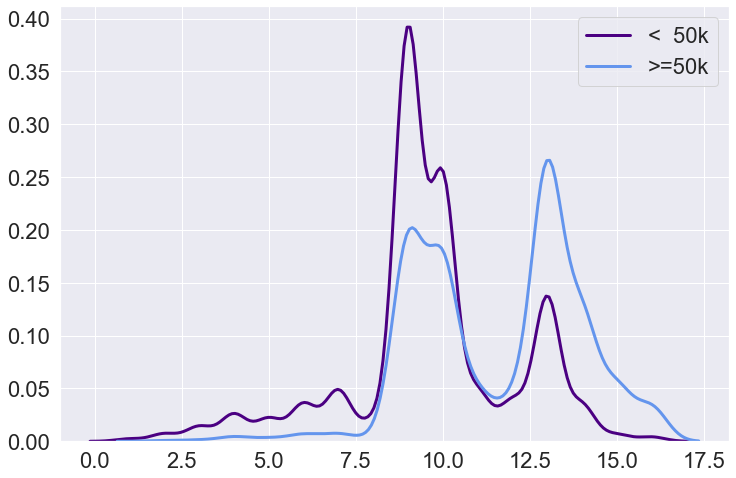

In [52]:
education_0 = train.loc[train['target'] == 0, 'education.num']
education_1 = train.loc[train['target'] == 1, 'education.num']

sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
sb = sns.distplot(education_0, hist = False, kde_kws={"color": "indigo", "lw": 3})
pn = sns.distplot(education_1, hist = False, kde_kws={"color": "cornflowerblue", "lw": 3})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

### capital.gain

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


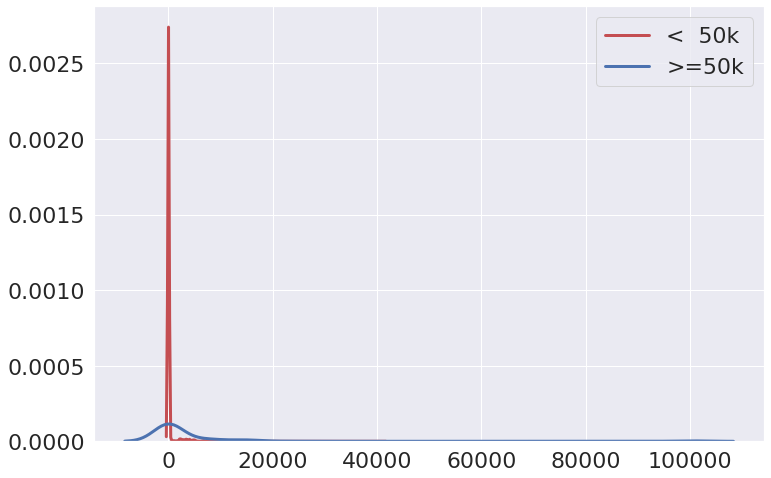

In [ ]:
gain_0 = train.loc[train['target'] == 0, 'capital.gain']
gain_1 = train.loc[train['target'] == 1, 'capital.gain']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
sb = sns.distplot(gain_0, hist = False, kde_kws={"color": "r", "lw": 3})
pn = sns.distplot(gain_1, hist = False, kde_kws={"color": "b", "lw": 3})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

### capital.loss

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


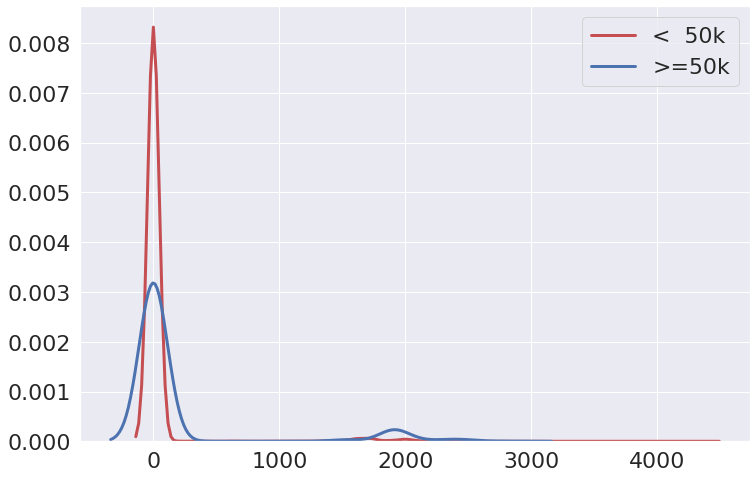

In [ ]:
loss_0 = train.loc[train['target'] == 0, 'capital.loss']
loss_1 = train.loc[train['target'] == 1, 'capital.loss']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
sb = sns.distplot(loss_0, hist = False, kde_kws={"color": "r", "lw": 3})
pn = sns.distplot(loss_1, hist = False, kde_kws={"color": "b", "lw": 3})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

### hours.per.week

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


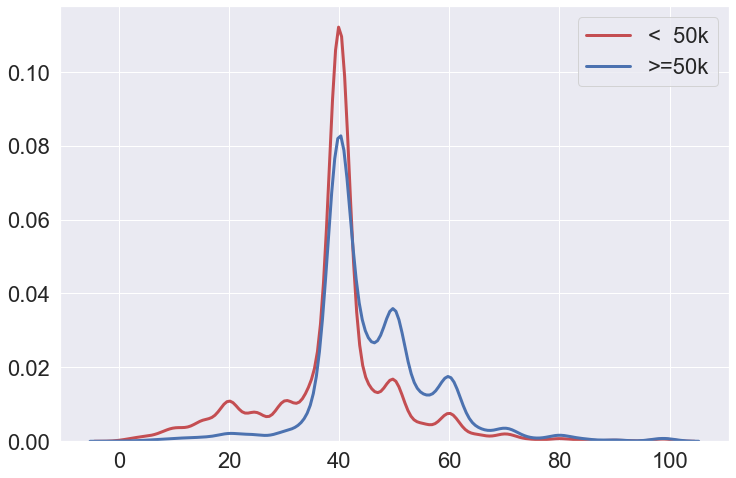

In [60]:
hours_0 = train.loc[train['target'] == 0, 'hours.per.week']
hours_1 = train.loc[train['target'] == 1, 'hours.per.week']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
sb = sns.distplot(hours_0, hist = False, kde_kws={"color": "r", "lw": 3})
pn = sns.distplot(hours_1, hist = False, kde_kws={"color": "b", "lw": 3})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

In [63]:
### value의 variance가 너무 크므로 보기 좋은 시각화를 위해 합쳐준다.
# target_0.groupby('hours.per.week')['target'].mean().reset_index()
target_0['hours.per.week'].value_counts()

40    5634
50     721
35     540
45     527
20     495
      ... 
82       1
92       1
94       1
88       1
74       1
Name: hours.per.week, Length: 86, dtype: int64

In [69]:
target_0[target_0['hours.per.week'] == 99]

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target
544,544,45,Private,10,Divorced,Craft-repair,Unmarried,Male,0,0,99,0
2208,2208,28,Self-emp-not-inc,4,Never-married,Other-service,Other-relative,Female,0,0,99,0
2349,2349,30,Private,9,Never-married,Protective-serv,Not-in-family,Male,0,0,99,0
2879,2879,65,Private,14,Never-married,Prof-specialty,Not-in-family,Male,0,0,99,0
3686,3686,53,Self-emp-not-inc,6,Married-spouse-absent,Transport-moving,Not-in-family,Male,0,0,99,0
4400,4400,90,Private,9,Widowed,Transport-moving,Unmarried,Male,0,0,99,0
5597,5597,56,Self-emp-inc,5,Married-civ-spouse,Transport-moving,Husband,Male,0,0,99,0
5736,5736,55,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,99,0
5916,5916,61,Self-emp-inc,14,Widowed,Exec-managerial,Unmarried,Female,0,0,99,0
7445,7445,29,Private,9,Divorced,Other-service,Unmarried,Female,0,0,99,0


In [78]:
 def get_score(a):
    if a < 10:
        score = 1
    elif a < 20:
        score = 2
    elif a < 30:
        score = 3
    elif a < 40:
        score = 4
    elif a < 50:
        score = 5
    elif a < 60:
        score = 6
    elif a < 70:
        score = 7
    elif a < 80:
        score = 8                     
    else:
        score = 9
    return score

In [79]:
target_0["주당근무시간"] = target_0["hours.per.week"].apply(lambda v: get_score(v))


In [80]:
target_0

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target,주당근무시간_1,주당근무시간
0,0,32,Private,12,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0,False,5
2,2,46,Private,10,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0,False,5
3,3,23,Private,13,Never-married,Adm-clerical,Own-child,Female,0,0,30,0,False,4
4,4,55,Private,9,Divorced,Adm-clerical,Not-in-family,Female,0,0,40,0,False,5
5,5,33,Private,13,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,0,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15075,15075,18,Private,9,Never-married,Machine-op-inspct,Not-in-family,Male,0,0,37,0,False,4
15076,15076,35,Private,14,Never-married,Exec-managerial,Not-in-family,Male,0,0,40,0,False,5
15077,15077,36,Private,10,Divorced,Adm-clerical,Not-in-family,Male,0,0,45,0,False,5
15079,15079,39,Private,10,Divorced,Tech-support,Not-in-family,Female,0,0,40,0,False,5


In [77]:
target_0['주당근무시간_1'] =  target_0[target_0['hours.per.week'] < 10]

ValueError: Columns must be same length as key

In [75]:
target_0

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target,주당근무시간_1
0,0,32,Private,12,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0,False
2,2,46,Private,10,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,0,False
3,3,23,Private,13,Never-married,Adm-clerical,Own-child,Female,0,0,30,0,False
4,4,55,Private,9,Divorced,Adm-clerical,Not-in-family,Female,0,0,40,0,False
5,5,33,Private,13,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,40,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15075,15075,18,Private,9,Never-married,Machine-op-inspct,Not-in-family,Male,0,0,37,0,False
15076,15076,35,Private,14,Never-married,Exec-managerial,Not-in-family,Male,0,0,40,0,False
15077,15077,36,Private,10,Divorced,Adm-clerical,Not-in-family,Male,0,0,45,0,False
15079,15079,39,Private,10,Divorced,Tech-support,Not-in-family,Female,0,0,40,0,False


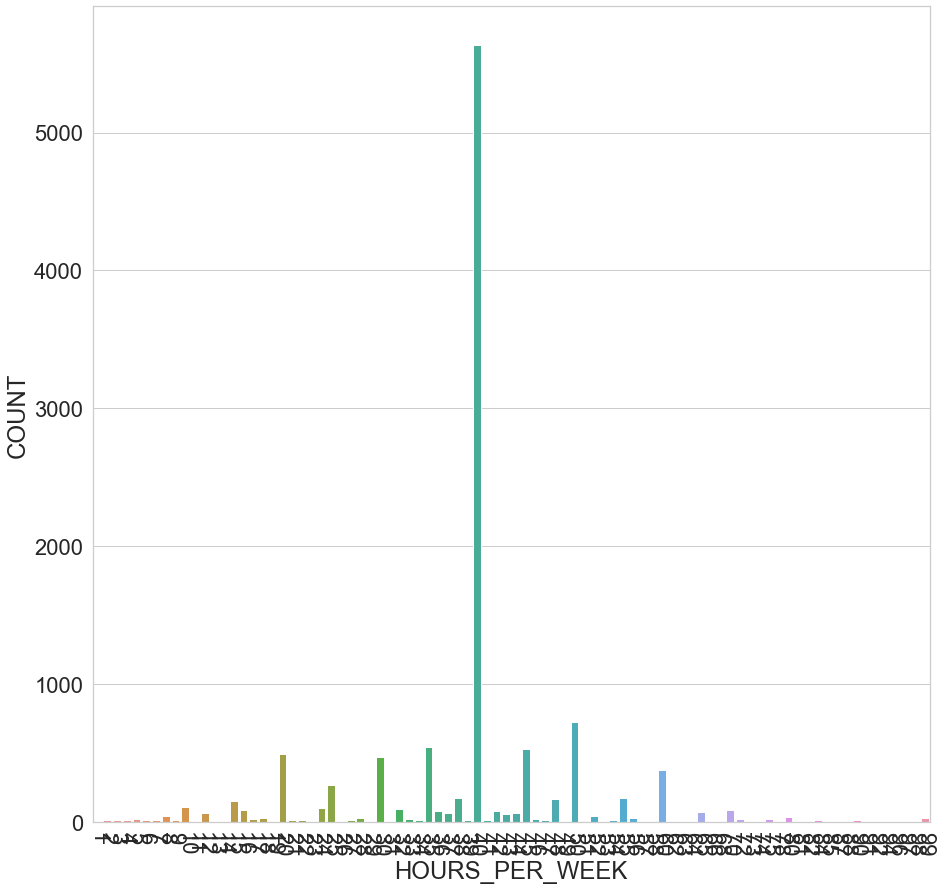

In [61]:
sns.set_style("whitegrid")
ax = sns.countplot(x=target_0['hours.per.week'], data=target_0)
ax.set(xlabel="HOURS_PER_WEEK", ylabel = "COUNT")
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()

In [ ]:
sns.set_style("whitegrid")
ax = sns.countplot(x=target_1['hours.per.week'], data=target_1)
ax.set(xlabel="HOURS_PER_WEEK", ylabel = "COUNT")
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(15,15)})
plt.show()

### sex

In [ ]:
# sex 변수는 2개의 값으로 이루어져있으므로 수치형으로 그냥 변환해준다.
train['sex'] = le.fit_transform(train['sex'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


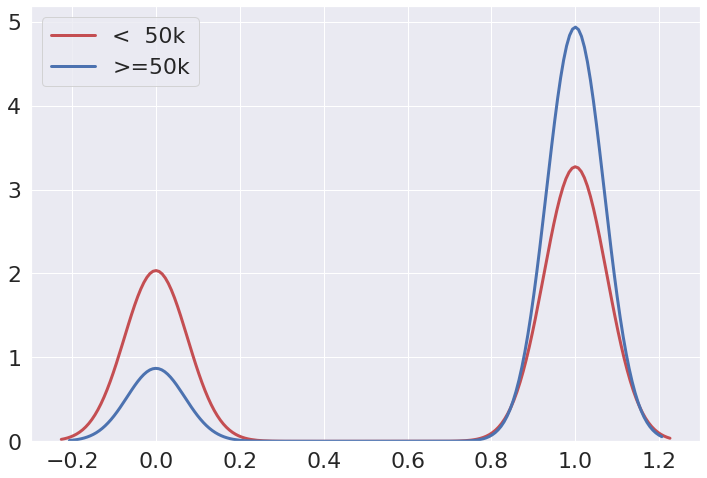

In [ ]:
sex_0 = train.loc[train['target'] == 0, 'sex']
sex_1 = train.loc[train['target'] == 1, 'sex']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
sb = sns.distplot(sex_0, hist = False, kde_kws={"color": "r", "lw": 3})
pn = sns.distplot(sex_1, hist = False, kde_kws={"color": "b", "lw": 3})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

## 범주형 변수 `workclass`, `marital.status`, `occupation`, `relationship`, ~~`sex`~~

### 변수 고유값 확인

In [ ]:
train['workclass'].value_counts()

Private             11158
Self-emp-not-inc     1230
Local-gov            1027
State-gov             640
Self-emp-inc          552
Federal-gov           468
Without-pay             6
Name: workclass, dtype: int64

In [ ]:
train['marital.status'].value_counts()

Married-civ-spouse       7092
Never-married            4814
Divorced                 2086
Separated                 454
Widowed                   424
Married-spouse-absent     199
Married-AF-spouse          12
Name: marital.status, dtype: int64

In [ ]:
train['occupation'].value_counts()

Exec-managerial      2039
Craft-repair         2032
Prof-specialty       1983
Adm-clerical         1844
Sales                1763
Other-service        1594
Machine-op-inspct    1004
Transport-moving      760
Handlers-cleaners     675
Farming-fishing       503
Tech-support          459
Protective-serv       345
Priv-house-serv        77
Armed-Forces            3
Name: occupation, dtype: int64

In [ ]:
train['relationship'].value_counts()

Husband           6242
Not-in-family     3836
Own-child         2232
Unmarried         1588
Wife               742
Other-relative     441
Name: relationship, dtype: int64

In [ ]:
train['sex'].value_counts()

1    10180
0     4901
Name: sex, dtype: int64

### workclass

In [ ]:
# train.groupby('workclass')['target'].mean().sort_values()

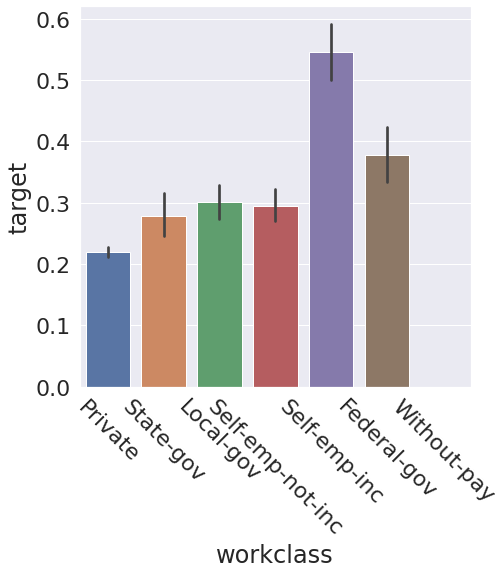

In [ ]:
sns.barplot(x = train['workclass'], y = train['target'])
plt.xticks(rotation = - 45 )
sns.set(rc = {'figure.figsize':(7,7)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


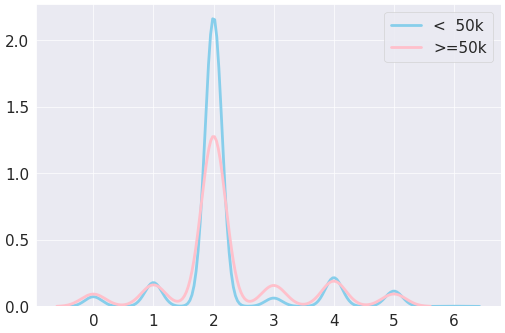

In [ ]:
workclass_0 = train_label_encoder.loc[train['target'] == 0, 'workclass']
workclass_1 = train_label_encoder.loc[train['target'] == 1, 'workclass']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8),dpi=50)
sb = sns.distplot(workclass_0, hist = False, kde_kws={"color": "skyblue", "lw": 4})
pn = sns.distplot(workclass_1, hist = False, kde_kws={"color": "pink", "lw": 4})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])
# 2 = 자영업

### marital.status

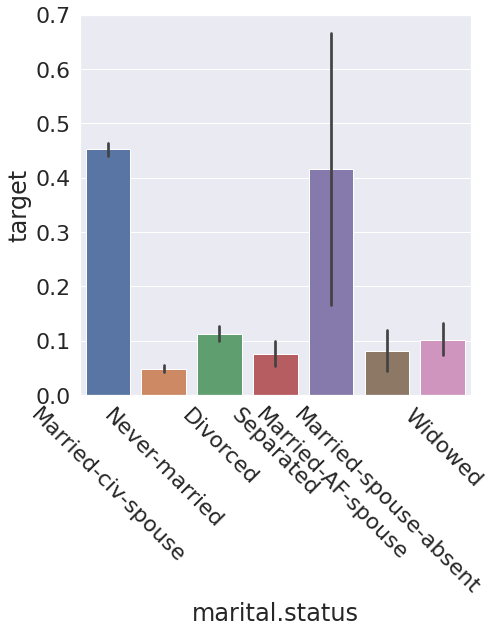

In [ ]:
sns.barplot(x = train['marital.status'], y = train['target'])
plt.xticks(rotation = - 45 )
sns.set(rc = {'figure.figsize':(7,7)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


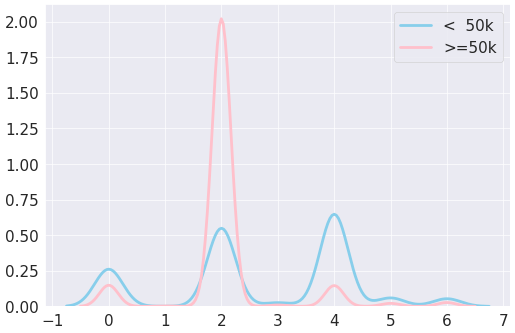

In [ ]:
marital_status_0 = train_label_encoder.loc[train['target'] == 0, 'marital.status']
marital_status_1 = train_label_encoder.loc[train['target'] == 1, 'marital.status']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8),dpi=50)
sb = sns.distplot(marital_status_0, hist = False, kde_kws={"color": "skyblue", "lw": 4})
pn = sns.distplot(marital_status_1, hist = False, kde_kws={"color": "pink", "lw": 4})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

### occupation

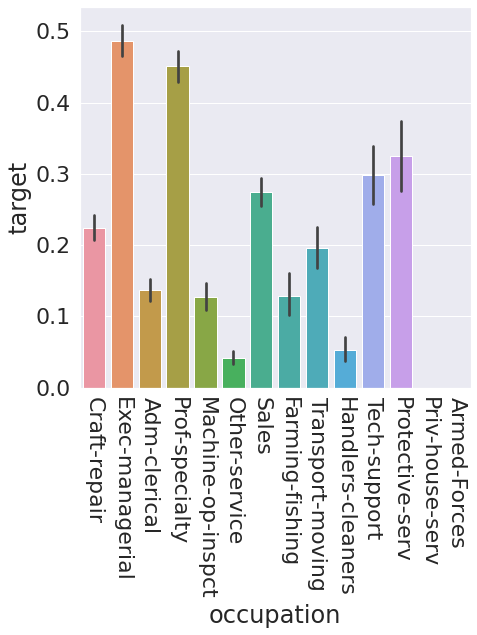

In [ ]:
sns.barplot(x = train['occupation'], y = train['target'])
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(7,7)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


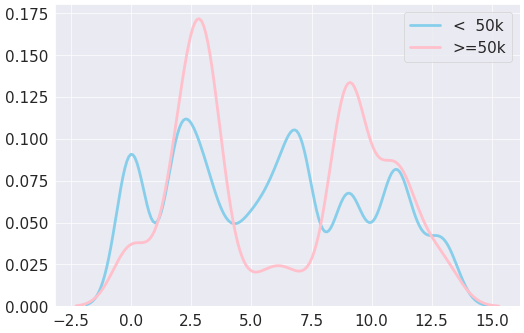

In [ ]:
occupation_0 = train_label_encoder.loc[train['target'] == 0, 'occupation']
occupation_1 = train_label_encoder.loc[train['target'] == 1, 'occupation']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8),dpi=50)
sb = sns.distplot(occupation_0, hist = False, kde_kws={"color": "skyblue", "lw": 4})
pn = sns.distplot(occupation_1, hist = False, kde_kws={"color": "pink", "lw": 4})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

### relationship

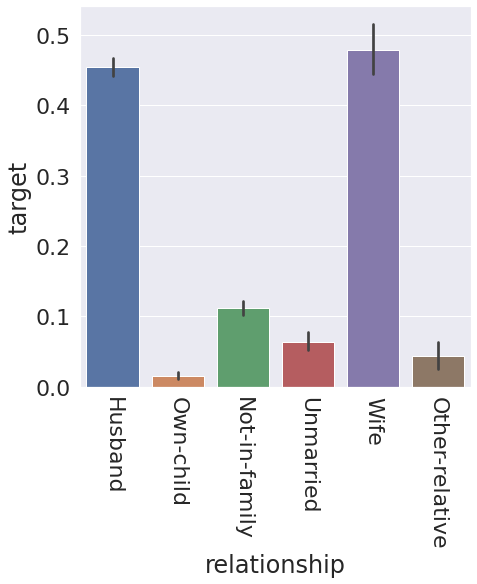

In [ ]:
sns.barplot(x = train['relationship'], y = train['target'])
plt.xticks(rotation = - 90 )
sns.set(rc = {'figure.figsize':(7,7)})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


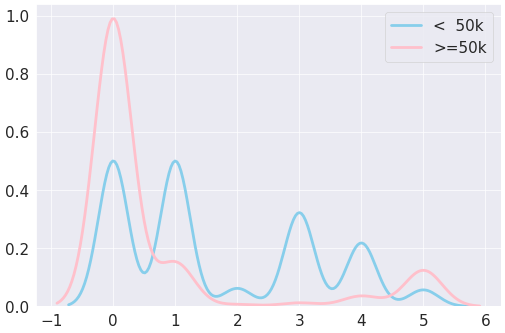

In [ ]:
relationship_0 = train_label_encoder.loc[train['target'] == 0, 'relationship']
relationship_1 = train_label_encoder.loc[train['target'] == 1, 'relationship']
sns.set(font_scale = 2)
plt.figure(figsize=(12,8),dpi=50)
sb = sns.distplot(relationship_0, hist = False, kde_kws={"color": "skyblue", "lw": 4})
pn = sns.distplot(relationship_1, hist = False, kde_kws={"color": "pink", "lw": 4})
sb.set_xlabel("", fontsize = 20)
pn.set_ylabel("", fontsize = 20)
plt.legend(labels=["<  50k",">=50k"])

### 간단한 전체적인 EDA

In [ ]:
import pandas as pd
import pandas_profiling

profile = train.profile_report()
profile

Output hidden; open in https://colab.research.google.com to view.

# 모델링

### get_dummies

범주형 데이터를 one-hot encoding을 사용하여 범주의 개수만큼 dummy variable을 만들어 0 또는 1을 각 범주마다 할당하여 새로운 특성으로 바꾸는 방법이다.

In [ ]:
train_one = pd.get_dummies(train)
train_one.head()

,id,age,education.num,sex,capital.gain,capital.loss,hours.per.week,target,workclass_Federal-gov,workclass_Local-gov,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,32,12,1,0,0,40,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,33,10,1,0,0,40,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,46,10,1,0,0,40,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,23,13,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,55,9,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
train

,id,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,target
0,0,32,Private,12,Married-civ-spouse,Craft-repair,Husband,1,0,0,40,0
1,1,33,Private,10,Married-civ-spouse,Exec-managerial,Husband,1,0,0,40,1
2,2,46,Private,10,Married-civ-spouse,Craft-repair,Husband,1,0,0,40,0
3,3,23,Private,13,Never-married,Adm-clerical,Own-child,0,0,0,30,0
4,4,55,Private,9,Divorced,Adm-clerical,Not-in-family,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,35,Private,14,Never-married,Exec-managerial,Not-in-family,1,0,0,40,0
15077,15077,36,Private,10,Divorced,Adm-clerical,Not-in-family,1,0,0,45,0
15078,15078,50,Self-emp-inc,15,Married-civ-spouse,Prof-specialty,Husband,1,0,0,45,1
15079,15079,39,Private,10,Divorced,Tech-support,Not-in-family,0,0,0,40,0


In [ ]:
test

,id,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,10,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States
1,1,34,Self-emp-inc,154227,10,Never-married,Sales,Not-in-family,White,1,0,0,75,United-States
2,2,31,Local-gov,158291,13,Never-married,Craft-repair,Not-in-family,White,1,8614,0,40,United-States
3,3,28,Private,183155,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,55,United-States
4,4,54,Local-gov,182543,10,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,30,Local-gov,182926,10,Married-civ-spouse,Protective-serv,Husband,White,1,15024,0,40,United-States
15077,15077,39,Private,176101,13,Married-civ-spouse,Craft-repair,Husband,White,1,0,0,40,United-States
15078,15078,48,Private,242406,7,Never-married,Machine-op-inspct,Unmarried,White,1,0,0,40,Puerto-Rico
15079,15079,44,Private,100584,9,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,1,0,0,40,United-States


In [ ]:
test['sex'] = le.fit_transform(test['sex'])

In [ ]:
del test['native.country']
del test['race']
del test['fnlwgt']

In [ ]:
test_one = pd.get_dummies(test)
test_one.head()

,id,age,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,47,10,1,0,0,45,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,34,10,1,0,0,75,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2,31,13,1,8614,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,28,13,1,0,0,55,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,4,54,10,0,0,0,40,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Pycaret을 활용하여 최적의 모델을 찾아준다.

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from pycaret.classification import *
reg = setup(train_one, target='target')

,Description,Value
0,session_id,8818
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15081, 42)"
5,Missing Values,False
6,Numeric Features,39
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Accuracy를 기준으로 좋은 모델 3개를 선정한다.
top3 = compare_models(sort = 'Accuracy',n_select = 3)
# top3 = lightgbm, gbc, ada


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8641,0.9201,0.6579,0.7726,0.7103,0.6223,0.6260,0.168
gbc,Gradient Boosting Classifier,0.8575,0.9139,0.5951,0.7917,0.6790,0.5898,0.6001,0.893
ada,Ada Boost Classifier,0.8519,0.9094,0.6224,0.7518,0.6804,0.5852,0.5901,0.317
lr,Logistic Regression,0.8401,0.8992,0.5921,0.7266,0.6522,0.5498,0.5549,1.237
rf,Random Forest Classifier,0.8371,0.8820,0.6217,0.7017,0.6591,0.5526,0.5544,0.988
lda,Linear Discriminant Analysis,0.8303,0.8879,0.5611,0.7093,0.6261,0.5183,0.5246,0.095
ridge,Ridge Classifier,0.8293,0.0000,0.5114,0.7354,0.6026,0.4985,0.5121,0.021
knn,K Neighbors Classifier,0.8262,0.8543,0.6101,0.6741,0.6403,0.5260,0.5274,0.513
et,Extra Trees Classifier,0.8201,0.8386,0.6011,0.6593,0.6287,0.5103,0.5114,1.071
nb,Naive Bayes,0.8102,0.8868,0.7701,0.5977,0.6729,0.5422,0.5510,0.024


In [ ]:
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8532,0.9091,0.5918,0.7745,0.6709,0.5786,0.5873
1,0.8390,0.8918,0.5634,0.7402,0.6398,0.5386,0.5469
2,0.8532,0.9216,0.5821,0.7839,0.6681,0.5765,0.5870
3,0.8466,0.9097,0.6157,0.7366,0.6707,0.5718,0.5757
4,0.8532,0.9210,0.5858,0.7811,0.6695,0.5776,0.5875
5,0.8598,0.9202,0.6493,0.7632,0.7016,0.6108,0.6142
6,0.8588,0.9098,0.5955,0.7950,0.6809,0.5926,0.6028
7,0.8550,0.9162,0.5618,0.8065,0.6623,0.5736,0.5888
8,0.8607,0.9009,0.6030,0.7970,0.6866,0.5992,0.6088


In [ ]:
blender_top3 = blend_models(estimator_list=tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8608,0.9123,0.6217,0.7830,0.6931,0.6046,0.6113
1,0.8561,0.9000,0.6269,0.7636,0.6885,0.5961,0.6010
2,0.8598,0.9241,0.6381,0.7703,0.6980,0.6078,0.6123
3,0.8580,0.9188,0.6530,0.7543,0.7000,0.6076,0.6103
4,0.8693,0.9317,0.6455,0.8009,0.7149,0.6314,0.6376
5,0.8731,0.9337,0.7090,0.7724,0.7393,0.6556,0.6567
6,0.8730,0.9206,0.6592,0.8037,0.7243,0.6428,0.6481
7,0.8664,0.9229,0.6367,0.7944,0.7069,0.6217,0.6280
8,0.8588,0.9085,0.6292,0.7706,0.6928,0.6023,0.6075


In [ ]:
final_model = finalize_model(blender_top3)
prediction = predict_model(final_model, data=test_one)

In [ ]:
from pycaret.utils import check_metric
check_metric(train['target'], prediction['target'], metric = 'Accuracy')

0.6408

In [ ]:
prediction.rename(columns = {"Label": "target"}, inplace = True)

In [ ]:
prediction.head()

,id,age,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,target,Score
0,0,47,10,1,0,0,45,0,0,1,...,0,0,1,0,0,0,0,0,1,0.6486
1,1,34,10,1,0,0,75,0,0,0,...,0,0,0,1,0,0,0,0,0,0.7262
2,2,31,13,1,8614,0,40,0,1,0,...,0,0,0,1,0,0,0,0,1,0.8286
3,3,28,13,1,0,0,55,0,0,1,...,0,0,1,0,0,0,0,0,1,0.5190
4,4,54,10,0,0,0,40,0,1,0,...,0,0,0,0,0,0,1,0,0,0.8191


In [ ]:
submission['target'] = prediction['target']

In [ ]:
submission.to_csv('소득예측.csv', index = False)